In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors

In [2]:
mycolors = np.array(list(mcolors.BASE_COLORS.keys()))

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


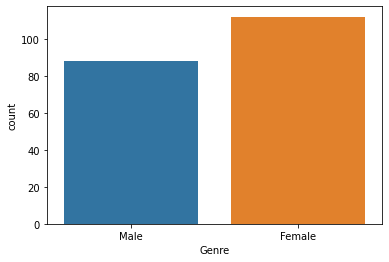

In [6]:
ax = sns.countplot(x=df.Genre, label="Count")

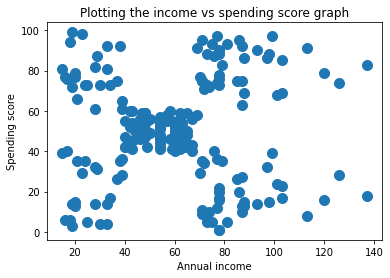

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s=100)
plt.title("Plotting the income vs spending score graph")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()

In [8]:
#preprocessing
df = df.drop('CustomerID', axis=1)

#transfering sex column from string to int
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_gender = encode.fit_transform(df.Genre)
df["Genre"] = encoded_gender
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<Axes: title={'center': 'Ages frequency'}, ylabel='Age'>

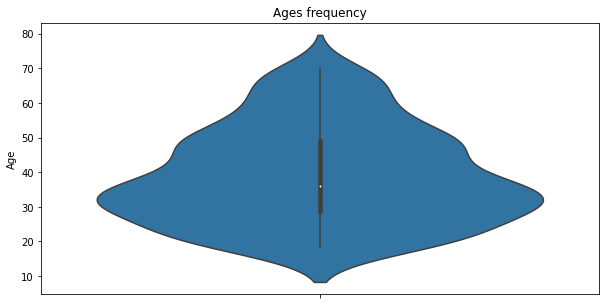

In [9]:
plt.figure(figsize=(10,5))
plt.title("Ages frequency")
sns.violinplot(y=df['Age'])

<Axes: xlabel='Genre', ylabel='Age'>

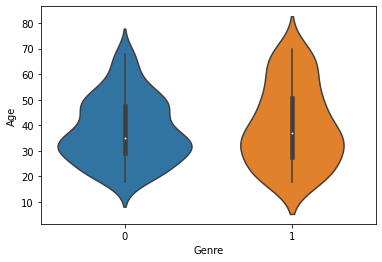

In [11]:
sns.violinplot(x=df['Genre'], y=df['Age'], data=df)

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.p

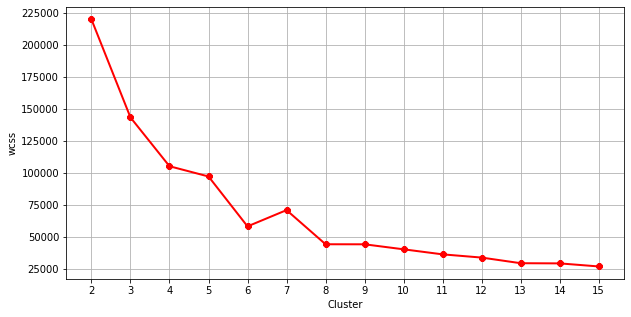

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
maxclust = 15 #maximum number of clusters
wcss = dict(zip(range(2, maxclust+1), np.zeros(maxclust))) #wcss is the sum of squared distances of samples to their closest cluster center
silh = dict(zip(range(2, maxclust+1), np.zeros(maxclust))) #silh is the silhouette score

scaler = StandardScaler().fit(df)
df2 = scaler.transform(df)


for k in range(2, maxclust+1):
    km = KMeans(n_clusters=k, init="k-means++", n_init='auto') #k-means++ is the initialization method and auto is the number of times the k-means algorithm will be run with different centroid seeds
    km.fit(df.iloc[:,0:])
    wcss[k] = km.inertia_
    silh[k] = silhouette_score(df.iloc[:,0:], km.labels_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(np.arange(2, maxclust+1), list(wcss.values()), linewidth=2, color="red", marker="8")
plt.xlabel("Cluster")
plt.xticks(np.arange(2, maxclust+1))
plt.ylabel("wcss")
plt.show()

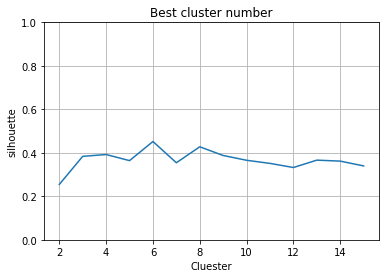

In [23]:
fig , ax = plt.subplots()
ax.plot(np.arange(2,maxclust+1,1),silh.values())
plt.ylim((0,1))
ax.set(xlabel="Cluester", ylabel="silhouette", title="Best cluster number")
ax.grid()
plt.show()

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


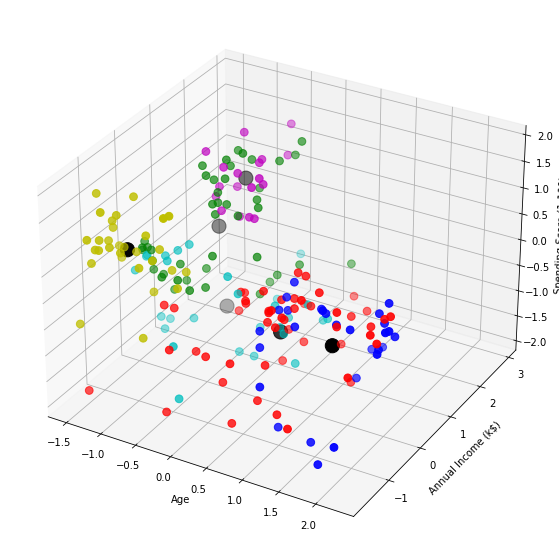

In [25]:
bestn = 6
km = KMeans(n_clusters=bestn, init='k-means++', max_iter=300, n_init='auto', random_state=0)
clusters = km.fit_predict(df2[:,0:])
myclon = [1,2,3]
fig = plt.figure(1,figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
mycols = np.array(df.columns)[myclon]
ax.scatter(df2[:,myclon[0]], df2[:,myclon[1]], df2[:,myclon[2]], c = mycolors[clusters], s=60)
ax.scatter(km.cluster_centers_[:,myclon[0]], km.cluster_centers_[:, myclon[1]], km.cluster_centers_[:,myclon[2]], s=200, c='black')
ax.set(xlabel=mycols[0], ylabel=mycols[1], zlabel=mycols[2])
plt.show()


In [28]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=2)
df_pca = pca_reducer.fit_transform(df2)
df_pca = pd.DataFrame(df_pca, columns=["pca1", "pca2"])
df_pca.head()

,pca1,pca2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


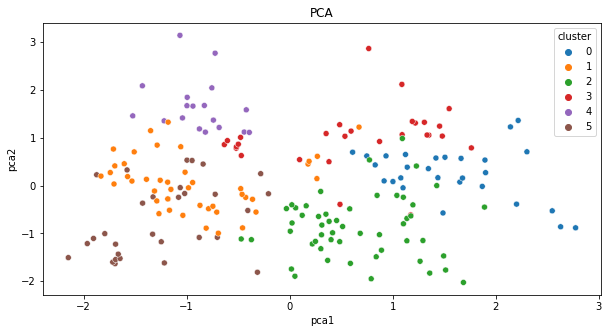

In [29]:
df_pca["cluster"] = clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_pca, palette="tab10")
plt.title("PCA")
plt.show()

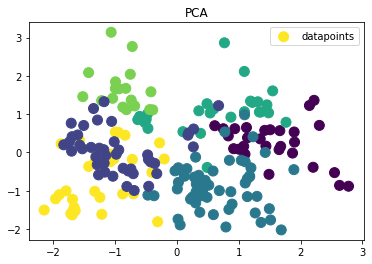

In [30]:
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1],label='datapoints', c=clusters, s=100)
plt.title("PCA")
plt.legend()
plt.show()

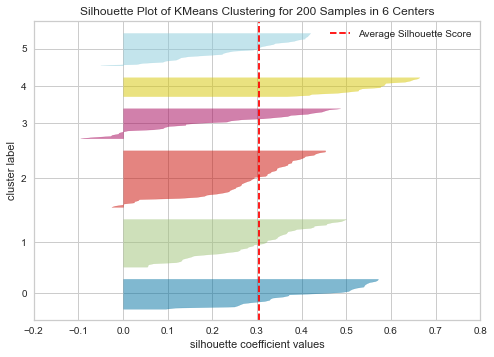

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# this code is for 
visualizer = SilhouetteVisualizer(km , colors='yellowbrick')
visualizer.fit(df2)
visualizer.show()

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.p

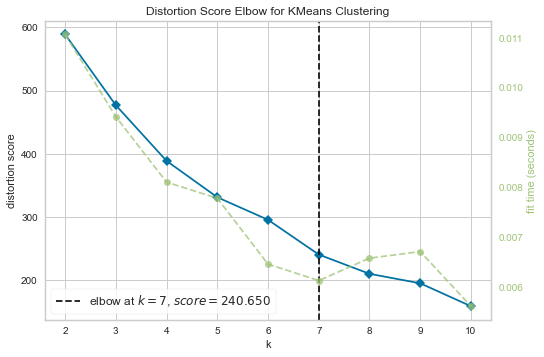

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
elb_visualizer = KElbowVisualizer(km, k=(2,11))
elb_visualizer.fit(df2)
elb_visualizer.show()

In [36]:
#after evaluating with these 3 diagrams now it's the time to name the clusters with getting the mean of every feature
clustercenter = pd.DataFrame(data= km.cluster_centers_,
                             index=np.arange(1, km.cluster_centers_.shape[0]+1),
                              columns=df.columns )
clustercenter['clusnum'] = clustercenter.index
clustercenter

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusnum
1,1.128152,1.468762,-0.238338,-0.038413,1
2,-0.886405,0.985052,-0.499071,-0.308926,2
3,1.128152,-0.399900,1.013441,1.260407,3
4,1.128152,-1.006450,-0.708425,0.459782,4
5,-0.886405,-0.960846,-1.330880,1.177786,5
6,-0.886405,-0.477932,0.972848,1.221585,6
7,1.128152,0.046648,0.938586,-1.403399,7
8,-0.886405,-0.740393,-0.348360,-0.278221,8
9,1.128152,0.943732,-1.323907,-1.279170,9
10,-0.886405,0.412658,1.212770,-1.110297,10


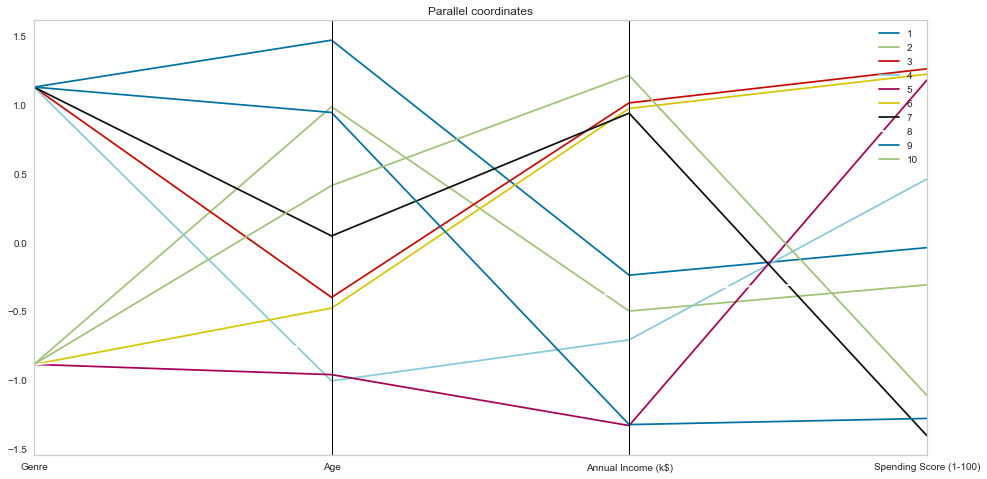

In [38]:
#parallal cordinates with pandas
plt.figure(figsize=(16,8))
pd.plotting.parallel_coordinates(clustercenter, 'clusnum', color=mycolors)
plt.title("Parallel coordinates")
plt.show()

In [39]:
import plotly.express as px
fig = px.parallel_coordinates(clustercenter,
                             color='clusnum',
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2,
                             title="Parallel coordinates")
#hide the color that are useless
fig.update_layout(width=1000, height=500)
fig.show()

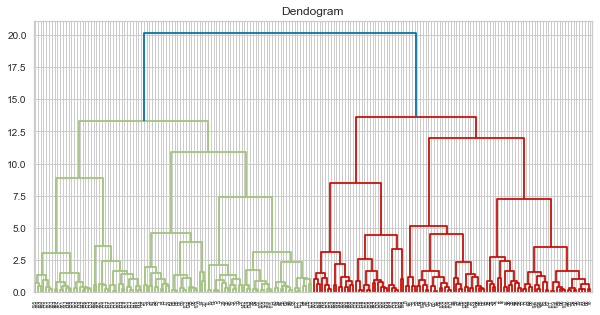

In [40]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,5))
plt.title("Dendogram")
dend = sch.dendrogram(sch.linkage(df2, method='ward'))
plt.show()

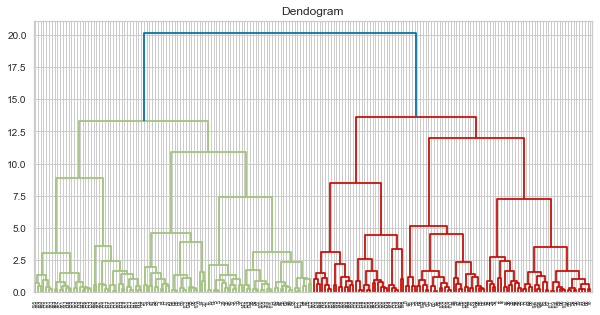

In [42]:
plt.figure(figsize=(10,5))
plt.title("Dendogram")
cluster = sch.linkage(df2, method='ward', metric='euclidean')
sch.dendrogram(cluster)
plt.axhline(y=125, color='r', linestyle='-')

In [43]:
from sklearn.cluster import AgglomerativeClustering #
model = AgglomerativeClustering(linkage='ward',
                                n_clusters=bestn)
model.fit(df2)
df['Aggl_clus'] = model.labels_
agglom_mean = df.groupby("Aggl_clus").mean()
agglom_mean


,Genre,Age,Annual Income (k$),Spending Score (1-100)
Aggl_clus,,,,
0,0.461538,32.692308,86.538462,82.128205
1,0.000000,27.105263,46.526316,58.552632
2,0.545455,41.454545,89.090909,16.181818
3,0.000000,49.789474,44.105263,39.657895
4,1.000000,56.551724,50.034483,41.344828
5,1.000000,24.565217,39.217391,59.652174
